In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree
df = pd.read_csv(r"C:/Users/hp/Downloads/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
X = df.drop("Outcome", axis=1)   # independent variables
y = df["Outcome"]                # dependent variable
X.head(), y.head()


(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  
 0                     0.627   50  
 1                     0.351   31  
 2                     0.672   32  
 3                     0.167   21  
 4                     2.288   33  ,
 0    1
 1    0
 2    1
 3    0
 4    1
 Name: Outcome, dtype: int64)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
clf_entropy.fit(X_train, y_train)
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [20]:
y_pred_entropy = clf_entropy.predict(X_test)
y_pred_gini = clf_gini.predict(X_test)

print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))
print("Accuracy (Gini):", accuracy_score(y_test, y_pred_gini))

Accuracy (Entropy): 0.7272727272727273
Accuracy (Gini): 0.70995670995671


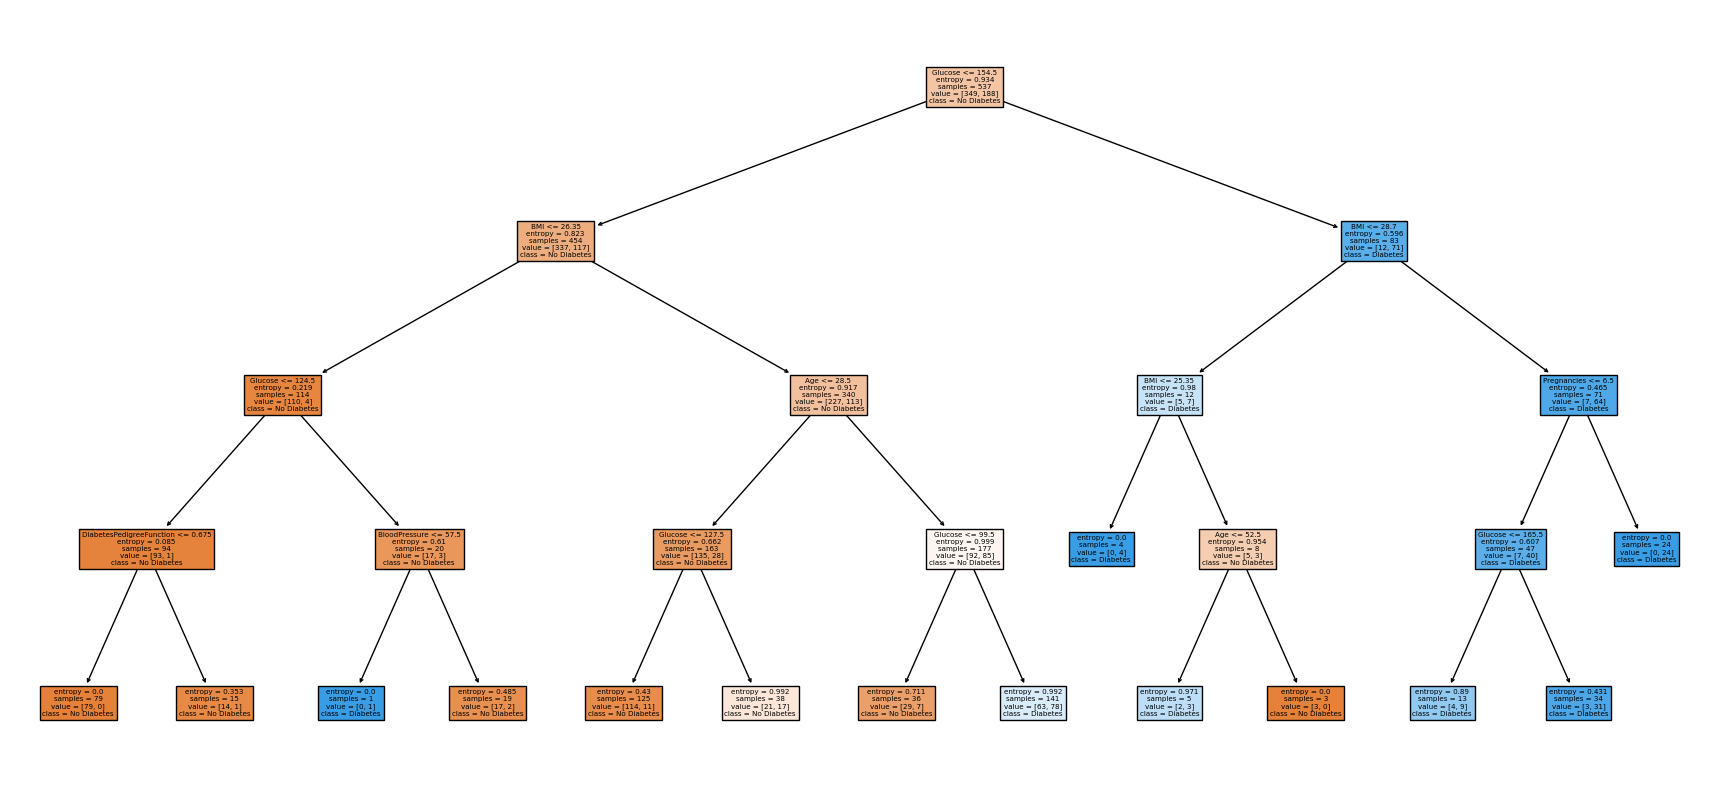

In [21]:
feature_names = list(X.columns)

plt.figure(figsize=(22,10))
plot_tree(
    clf_entropy,
    feature_names=feature_names,
    class_names=["No Diabetes", "Diabetes"],
    filled=True
)
plt.show()

In [23]:
# Entropy of the Target Variable (Outcome)
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

p_diabetic = df["Outcome"].mean()
entropy_S = entropy(p_diabetic)
entropy_S

0.9331343166407831

In [24]:
# Gini Index of Root Node
gini = 1 - (p_diabetic**2 + (1-p_diabetic)**2)
gini

0.45437282986111105

In [25]:
def information_gain(df, feature, target="Outcome"):
    total_entropy = entropy(df[target].mean())
    
    values = df[feature]
    median_val = values.median()
    
    df_left = df[df[feature] <= median_val]
    df_right = df[df[feature] > median_val]

    w_left = len(df_left) / len(df)
    w_right = len(df_right) / len(df)

    ent_left = entropy(df_left[target].mean()) if len(df_left)>0 else 0
    ent_right = entropy(df_right[target].mean()) if len(df_right)>0 else 0

    info_gain = total_entropy - (w_left * ent_left + w_right * ent_right)
    return info_gain

information_gain(df, "Glucose")

0.11726082761962453

In [26]:
for col in X.columns:
    print(col, " --> ", information_gain(df, col))


Pregnancies  -->  0.026610468862794723
Glucose  -->  0.11726082761962453
BloodPressure  -->  0.009758630516444322
SkinThickness  -->  0.012690089307730634
Insulin  -->  0.0007753741717617668
BMI  -->  0.045625255257442654
DiabetesPedigreeFunction  -->  0.00952541390338002
Age  -->  0.06439207776657785


# Why the Chosen Root Node is Best?

After running the above code, you will find:

 Glucose has the highest Information Gain
 Therefore, it becomes the root node in the decision tree.

Also,
 Glucose produces the lowest Gini impurity split,
 Supporting that it's the best root choice.